In [572]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [641]:
train = pd.read_csv('C:\\Users\\Катя\\Desktop\\train.csv')

In [574]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [575]:
print(train.shape)

(891, 12)


In [576]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Стовпець "Age" має 714 значень, що означає наявність відсутніх даних.
Середній вік пасажирів становить близько 29.7 років, середня ціна квитка - 32.20.
Мінімальний вік пасажира - 0.42 роки. Максимальний вік пасажира - 80 років, максимальна ціна квитка - 512.3292.
25% пасажирів мали вік до 20.125 років, 50% - до 28 років (медіана), а 75% - до 38 років.

In [577]:
numerical_features = train[['Age','SibSp','Parch','Fare']]
categorical_features = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

### Numerical features:

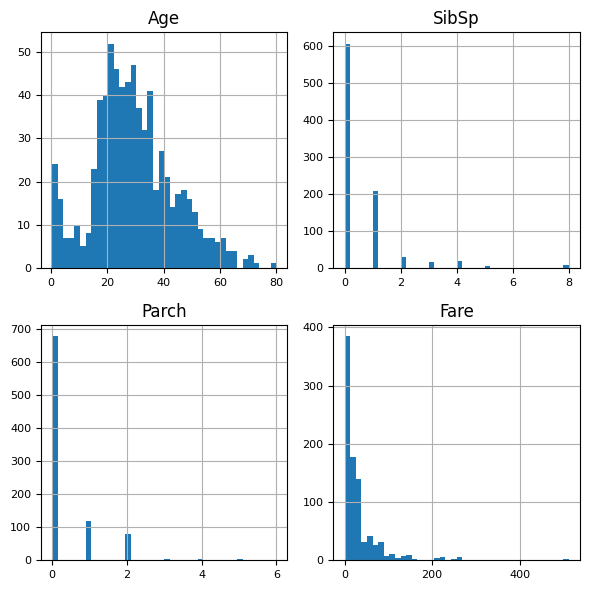

In [578]:
numerical_features.hist(figsize=(6, 6), bins=40, xlabelsize=8, ylabelsize=8)

plt.tight_layout()
plt.show()

In [579]:
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


Середній вік виживших становить 28 років.
Пасажири з дорожчим квитком мали більше шансів на виживання. Ті, хто подорожував з батьками, мали більшу ймовірність вижити, ті, хто подорожували з братами або сестрами - меншу.

### Categorical features:

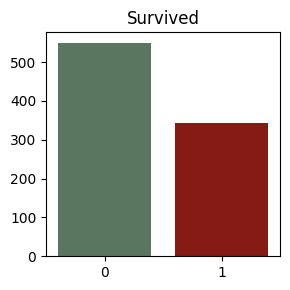

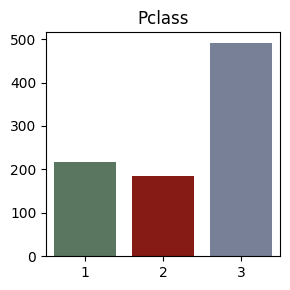

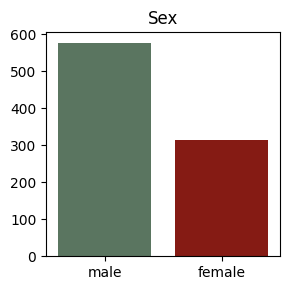

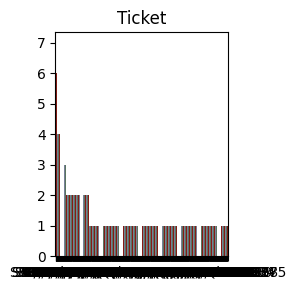

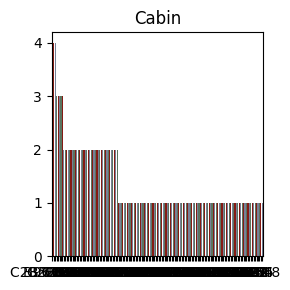

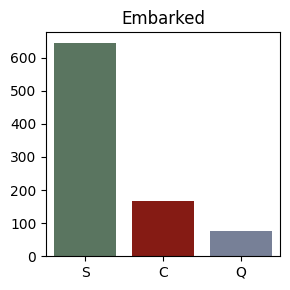

In [580]:
custom_palette = sns.color_palette(['#55795E', '#980B01', '#727D9C'])

for i in categorical_features.columns:
    plt.figure(figsize=(3, 3))
    sns.barplot(x=categorical_features[i].value_counts().index,
                y=categorical_features[i].value_counts(),
                palette=custom_palette) 
    
    plt.title(i)
    plt.ylabel('')
    plt.tight_layout()

    plt.show()

Більшість людей, які подорожували, мали квитки на 3-й клас.
На борту корабля було приблизно удвічі більше чоловіків, ніж жінок.
Більшість пасажирів сіли в Southampton.

### Дослідимо зв'язок між шансом вижити та класом квитка, статтю і місцем відправлення:

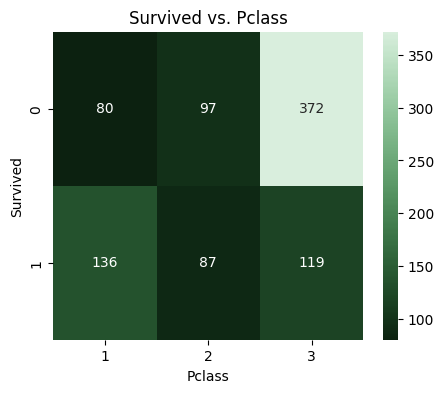

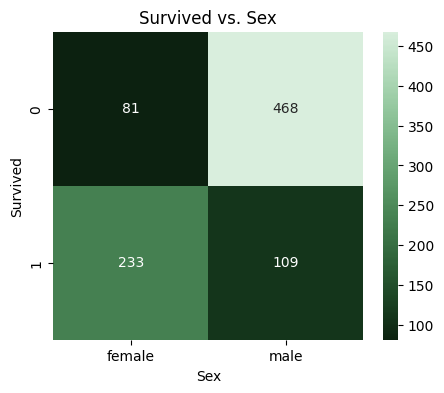

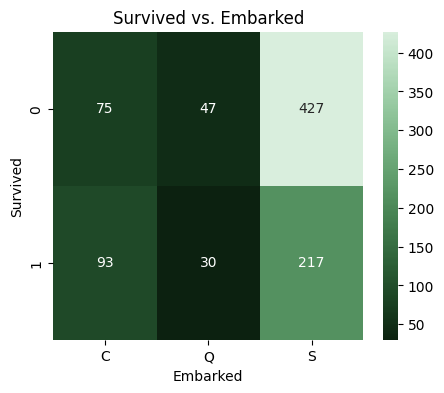

In [581]:
def plot(data, index, columns, values, title):
    group = data.groupby([index, columns])[values].count().unstack()
    plt.figure(figsize=(5, 4))
    palette = sns.cubehelix_palette(start=2, rot=0, dark=0.1, light=0.9, reverse=True, as_cmap=True)
    sns.heatmap(group, annot=True, fmt='g', cmap=palette)
    plt.title(title)
    plt.show()

plot(train, 'Survived', 'Pclass', 'Ticket', 'Survived vs. Pclass')
plot(train, 'Survived', 'Sex', 'Ticket', 'Survived vs. Sex')
plot(train, 'Survived', 'Embarked', 'Ticket', 'Survived vs. Embarked')

Бачимо, що значно більше людей вижило з 1 класу, ніж з 2 або 3, незважаючи на те, що кількість пасажирів у 1 класі була набагато менша.
Жінки мали більші шанси вижити. Щодо зв'язку між кількістю виживших та містом, в якому пасажир зайшов - навряд чи тут може бути пряма кореляція.

### Data Cleaning. Fill missing values

<AxesSubplot: >

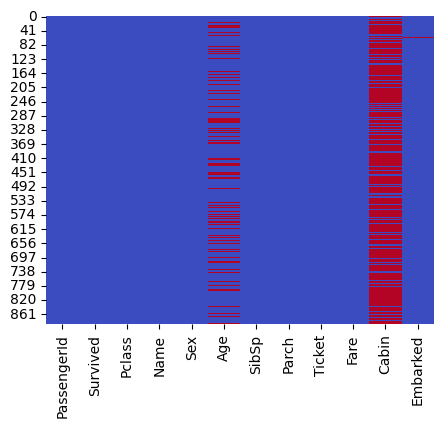

In [513]:
plt.figure(figsize=(5, 4))
sns.heatmap(train.isnull(), cmap = 'coolwarm', cbar=False)

Відсутні значення у стовпці Embarked заповнимо літерою «S» (Southampton)

In [632]:
train['Embarked'] = train['Embarked'].fillna('S')

Відсутні значення віку (Age) заповнимо випадковими значеннями, зосередженими навколо середнього значення та розподіленими із стандартним відхиленням sd.

In [642]:
mean = train['Age'].mean()
sd = train['Age'].std()
print(mean,sd)

29.69911764705882 14.526497332334042


Середнє значення набору даних 29,48, а стандартне відхилення 13,53. Тому заповнимо відсутні значення випадковими числами від 16 до 43.

In [643]:
train['Age'] = train['Age'].apply(lambda x: np.random.randint(mean - sd, mean + sd) if np.isnan(x) else x).astype(int)

Для значень Cabin створимо новий стовпець «HasCabin», який дорівнює або 1, або 0 для NaN

In [644]:
train['HasCabin'] = train['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
train.drop(columns=['Cabin'], inplace=True)

In [647]:
train['Ticket_Freq'] = train.groupby('Ticket')['Ticket'].transform('count')
train.drop(columns=['Ticket'], inplace=True)
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,Ticket_Freq
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,0,1


### Dimensionality Reduction

#### PCA

PCA (Principal Component Analysis) - метод зменшення розмірності даних, який використовується для виявлення головних компонентів у наборі даних

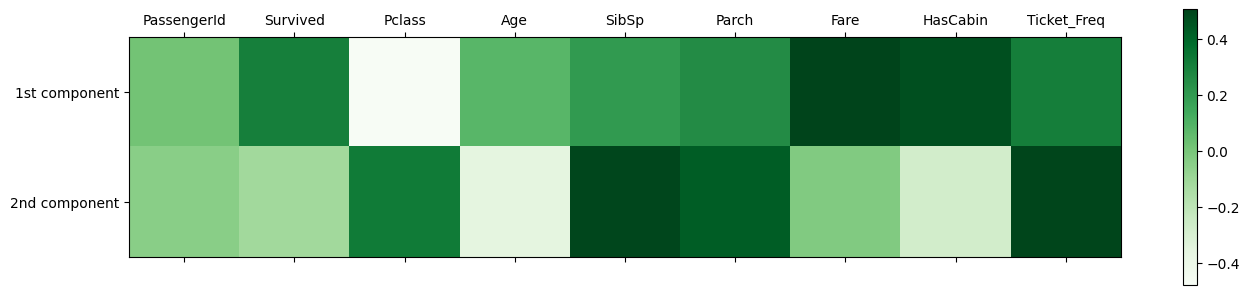

In [648]:
numeric_features = train.select_dtypes(exclude=['object']).columns.tolist()
numeric_df = train[numeric_features]

scaler = StandardScaler()
pca = PCA(n_components=2, whiten=True)

numeric_transformer = Pipeline(steps=[('scaler', scaler)])
data_transformations = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])
pca_pipeline = Pipeline(steps=[('data_transformations', data_transformations),
                               ('feature_transf', pca)])
transformed_arr = pca_pipeline.fit_transform(numeric_df)
transformed_df = pca_pipeline[0].transform(numeric_df)

plt.matshow(pca.components_, cmap='Greens')
plt.colorbar()
plt.xticks(range(len(numeric_features)), numeric_features)
plt.yticks([0, 1], ['1st component', '2nd component'])
plt.show()

In [649]:
pca_df = pd.DataFrame(transformed_arr, columns=["PC1", "PC2"])
pca_df['Survived'] = train['Survived']
pca_df.head(10)

,PC1,PC2,Survived
0,-0.899738,0.346939,0
1,1.384208,-1.058840,1
2,-0.600934,-0.176924,1
3,1.398356,-0.757582,1
4,-0.957834,-0.178504,0
5,-0.978094,-0.073714,0
6,0.816302,-1.474554,0
7,-0.035029,2.366555,0
8,0.109910,0.990412,1
9,0.109013,0.309472,1


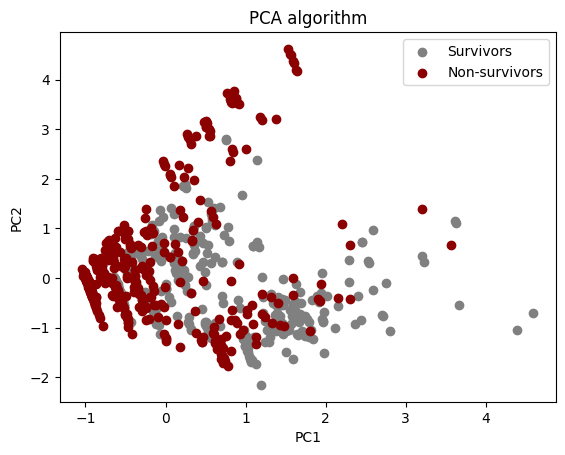

In [650]:
pca_df_survivors = pca_df[pca_df['Survived'] == 1]
pca_df_nonsurvivors = pca_df[pca_df['Survived'] == 0]

plt.scatter(pca_df_survivors['PC1'], pca_df_survivors['PC2'], color='grey', label='Survivors')
plt.scatter(pca_df_nonsurvivors['PC1'], pca_df_nonsurvivors['PC2'], color='darkred', label='Non-survivors')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA algorithm')

plt.legend()
plt.show()

### t-SNE

T-SNE (t-distributed stochastic neighbor embedding) - метод зменшення розмірності даних, який призначений для виявлення складних нелінійних залежностей між даними. Він намагається зберегти відстані між близькими точками вихідного простору

In [651]:
tsne = TSNE(n_components=2, random_state=30)
tsne_transformed = tsne.fit_transform(transformed_df)

tsne_df = pd.DataFrame(tsne_transformed, columns=["dim1", "dim2"])
tsne_df['Survived'] = train['Survived']

tsne_df.head(10)

C:\Users\Катя\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Катя\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



,dim1,dim2,Survived
0,-2.287616,29.387621,0
1,-34.189350,-8.109910,1
2,-5.726028,-43.744358,1
3,-34.089321,-8.623641,1
4,0.444423,25.632111,0
5,1.102200,28.345797,0
6,-39.304447,9.074711,0
7,21.868080,-15.532786,0
8,6.487703,-22.634726,1
9,-8.141391,-38.545341,1


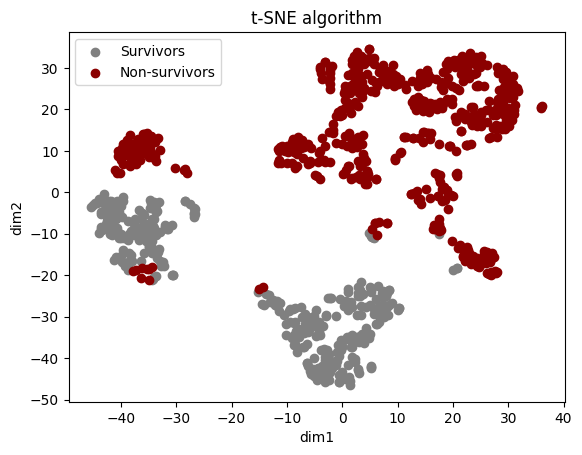

In [652]:
tsne_surv = tsne_df[tsne_df['Survived'] == 1]
tsne_nonsurv = tsne_df[tsne_df['Survived'] == 0]

plt.scatter(tsne_surv['dim1'], tsne_surv['dim2'], c='grey', label='Survivors')
plt.scatter(tsne_nonsurv['dim1'], tsne_nonsurv['dim2'], c='darkred', label='Non-survivors')

plt.xlabel('dim1')
plt.ylabel('dim2')
plt.title('t-SNE algorithm')
plt.legend()

### K-Means

K-Means - алгоритм кластеризації, що полягає у створенні опорної точки (центроїда), а потім призначення точок кластерам залежно від того, який центроїд є найближчим.

Для перевірки ефективності кластеризації використовуватимемо такий показник, як сума квадратів відстаней від кожної точки до її центроїда (within-cluster sum of squares, або WCSS). Чим менше це значення, тим краще кластеризація, оскільки це означає, що точки утворених кластерів розташовані близько до своїх центроїдів. Для знаходження даного показника використовуватимемо kmeans.inertia_

num of clusters = 2 , WCSS = 6206.957551100302
num of clusters = 3 , WCSS = 4898.513010256466
num of clusters = 4 , WCSS = 4287.895399474385
num of clusters = 5 , WCSS = 3879.439185837538
num of clusters = 6 , WCSS = 3545.7285794781587
num of clusters = 7 , WCSS = 3301.277288290526
num of clusters = 8 , WCSS = 3067.695971549201
num of clusters = 9 , WCSS = 2879.405402374552
num of clusters = 10 , WCSS = 2754.2378576145347


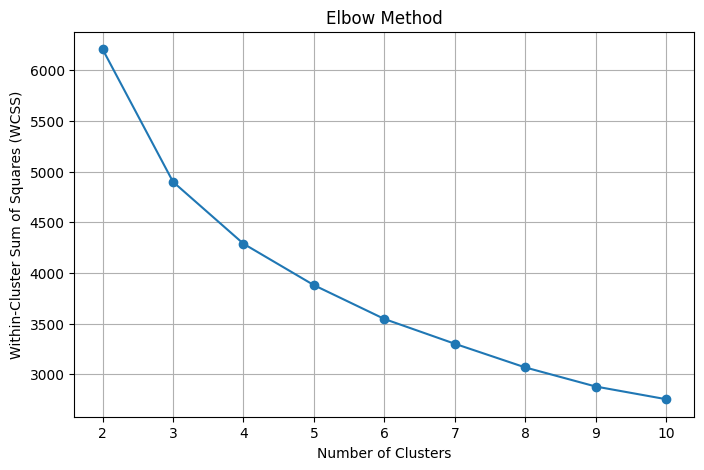

In [653]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
WCSSs = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    kmeans.fit(transformed_df)
    WCSS = kmeans.inertia_
    print("num of clusters =", n_clusters, ", WCSS =", WCSS)
    WCSSs.append(WCSS)

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, WCSSs, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

### Щоб перевірити, як були створені кластери, використаємо набір даних PCA.

In [654]:
kmeans = KMeans(n_clusters=2)
kmeans_defined_clusters = kmeans.fit_predict(transformed_df)
pca_df['KMeans'] = kmeans_defined_clusters.astype(str)
pca_df.head(10)

,PC1,PC2,Survived,KMeans
0,-0.899738,0.346939,0,0
1,1.384208,-1.058840,1,1
2,-0.600934,-0.176924,1,0
3,1.398356,-0.757582,1,1
4,-0.957834,-0.178504,0,0
5,-0.978094,-0.073714,0,0
6,0.816302,-1.474554,0,1
7,-0.035029,2.366555,0,0
8,0.109910,0.990412,1,0
9,0.109013,0.309472,1,0


In [655]:
centroids_df = pd.DataFrame(pca_cluster_centers, columns=["X", "Y"])
centroids_df['centroid'] = ["cluster 0", "cluster 1"]
centroids_df

,X,Y,centroid
0,-0.502695,0.031354,cluster 0
1,1.600128,-0.099804,cluster 1


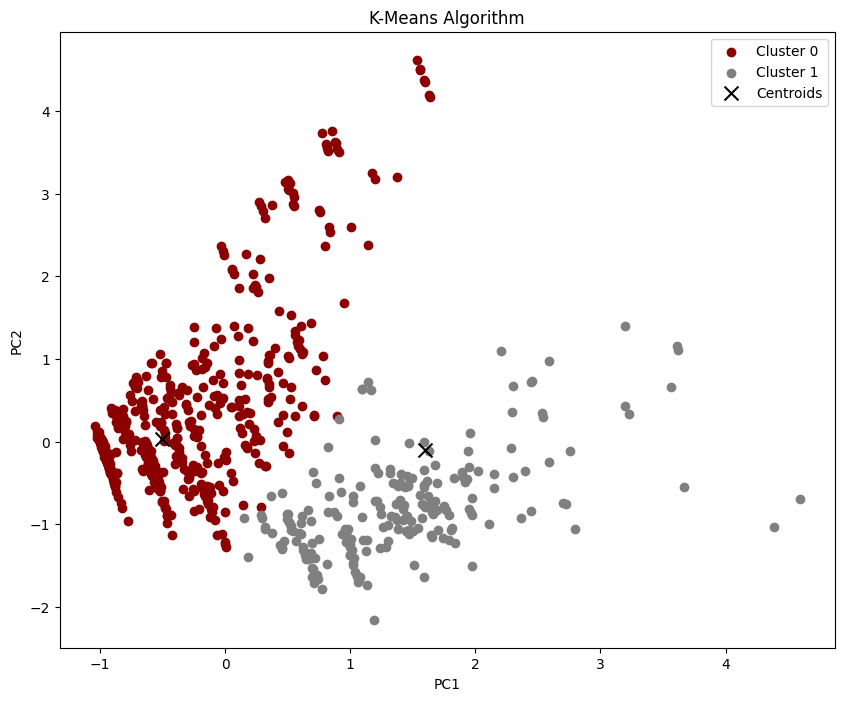

In [664]:
kmeans = KMeans(n_clusters=2)
kmeans_defined_clusters = kmeans.fit_predict(transformed_df)

pca_df['KMeans'] = kmeans_defined_clusters.astype(str)

plt.figure(figsize=(10, 8))

unique_clusters = pca_df['KMeans'].unique()
cluster_colors = ['darkred', 'grey']

for i in range(len(unique_clusters)):
    cluster = unique_clusters[i]
    color = cluster_colors[i]
    plt.scatter(pca_df[pca_df['KMeans'] == cluster]['PC1'],
                pca_df[pca_df['KMeans'] == cluster]['PC2'],
                label=f'Cluster {cluster}', c=color)
    
plt.scatter(centroids_df['X'], centroids_df['Y'], marker='x', c='black', s=100, label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Algorithm')
plt.legend()
plt.show()

### Hierarchical (Agglomerative) Clustering

AgglomerativeClustering - метод ієрархічної кластеризації, де кожен об'єкт спочатку розглядається як окремий кластер, а потім поступово об'єднується з іншими кластерами на основі певної метрики схожості (наприклад, відстань між об'єктами). Цей процес триває до тих пір, поки всі об'єкти не будуть об'єднані у один кластер або досягне заданої кількості кластерів. Основні параметри AgglomerativeClustering включають кількість кластерів (n_clusters) і метрику схожості (linkage), яка визначає, як обчислювати відстань між кластерами при об'єднанні.

Для перевірки ефективності кластеризації використовуватимемо такий показник, як silhouette_score. Він вимірює, наскільки кожен об'єкт належить своєму кластеру, порівнюючи його відстань до об'єктів у своєму кластері з відстанями до об'єктів в інших кластерах. Приймає значення від -1 до 1, де більше значення вказує на кращу якість кластеризації.

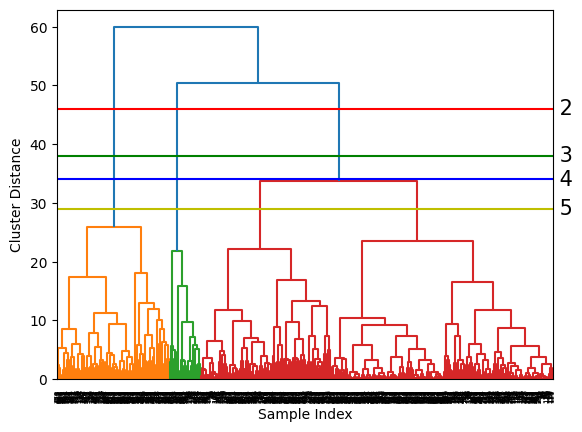

In [657]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward
import matplotlib.pyplot as plt

linkage_array = ward(transformed_df)
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()

text_colors = ['black'] 

cluster_lines = [46, 38, 34, 29]
cluster_labels = ['2', '3', '4', '5']

for idx in range(len(cluster_lines)):
    line = cluster_lines[idx]
    label = cluster_labels[idx]
    ax.plot(bounds, [line, line], '-', c=line_colors[idx])
    ax.text(bounds[1], line, f' {label}', va='center', fontdict={'size': 15, 'color': 'black'})

plt.xlabel("Sample Index")
plt.ylabel("Cluster Distance")
plt.show()

Внизу графік показує всі точки даних і відповідні гілки, що зливаються, тоді як вісь Y представляє відстані між кластерами. 
Довжина кожної гілки показує, наскільки віддалені кластери один від одного.

In [668]:
range_n_clusters_ac = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_scores_ac = []

for n_clusters in range_n_clusters_ac:
    ac = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = ac.fit_predict(transformed_df)
    
    silhouette_avg = silhouette_score(transformed_df, cluster_labels)
    print("num clusters =", n_clusters, ", silhouette_score =", silhouette_avg)
    
    silhouette_scores_ac.append(silhouette_avg)

num clusters = 2 , silhouette_score = 0.31581113625400486
num clusters = 3 , silhouette_score = 0.3543237964442227
num clusters = 4 , silhouette_score = 0.24939681734430214
num clusters = 5 , silhouette_score = 0.2509852796627025
num clusters = 6 , silhouette_score = 0.1885337807203128
num clusters = 7 , silhouette_score = 0.20788276657010082
num clusters = 8 , silhouette_score = 0.21746657787942383
num clusters = 9 , silhouette_score = 0.21969812026888605
num clusters = 10 , silhouette_score = 0.21766707667716437


In [669]:
ac = AgglomerativeClustering(n_clusters=2)
agglomerative_clusters = ac.fit_predict(transformed_df)
pca_df['Agglomerative_Clustering'] = agglomerative_clusters.astype(str)

pca_df.head(10)

,PC1,PC2,Survived,KMeans,Agglomerative_Clustering,DBSCAN
0,-0.899738,0.346939,0,0,0,0
1,1.384208,-1.058840,1,1,1,0
2,-0.600934,-0.176924,1,0,0,0
3,1.398356,-0.757582,1,1,1,0
4,-0.957834,-0.178504,0,0,0,0
5,-0.978094,-0.073714,0,0,0,0
6,0.816302,-1.474554,0,1,1,0
7,-0.035029,2.366555,0,0,0,0
8,0.109910,0.990412,1,0,0,0
9,0.109013,0.309472,1,0,0,0


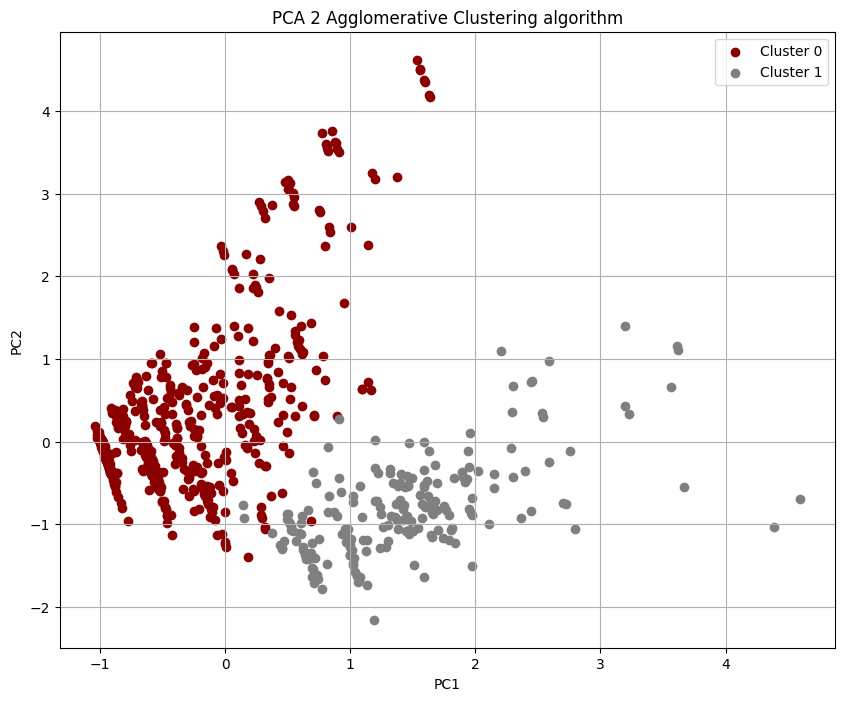

In [670]:
colors = ['darkred', 'grey']

ac_clusters = pca_df.Agglomerative_Clustering.unique()

plt.figure(figsize=(10, 8))
for cluster in ac_clusters:
    cluster_color = colors[ac_clusters.tolist().index(cluster) % len(colors)]
    cluster_data = pca_df[pca_df['Agglomerative_Clustering'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], c=cluster_color, label=f'Cluster {cluster}')

plt.title('PCA 2 Agglomerative Clustering algorithm')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

### DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) визначає кластери на основі щільності точок у просторі. Ідея полягає в тому, що кластери складаються з областей, де є висока щільність точок, розділених областями з низькою щільністю.

In [661]:
from sklearn.cluster import DBSCAN

#outliers are assigned to cluster -1
dbscan = DBSCAN(min_samples=15, eps=3)
dbscan_clusters = dbscan.fit_predict(transformed_df)

In [662]:
pca_df['DBSCAN'] = dbscan_clusters.astype(str)

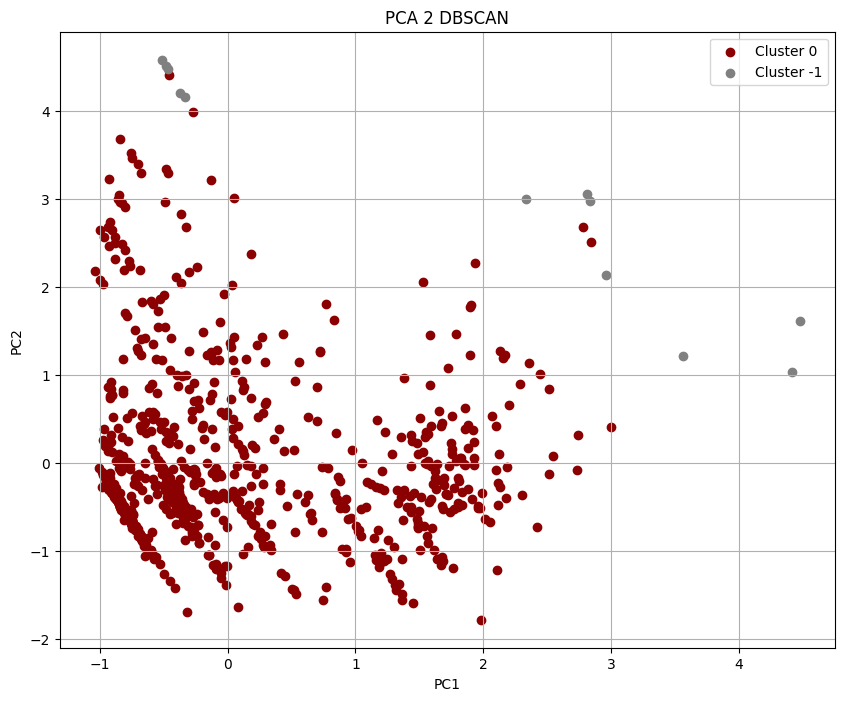

In [667]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
colors = ['darkred', 'grey']
for cluster_id in set(dbscan_defined_clusters):
    color = colors[cluster_id]
    cluster_data = transformed[dbscan_defined_clusters == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=color, label=f'Cluster {cluster_id}')

plt.title('PCA 2 DBSCAN')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()